## Confocal MS2 data Exploration

**Author**: Ciera Martinez

**Objective**: Reading my MS2 data from the confocal an do exploration of how to scrape nuclei outlines an MS2 spots.

**About Data**: These were taken at and around stage 14 of Drosophila embryo development. The files are in czi.


## Sumary

- Part1a: Read in .czi files
- Part1b: Visualization of image slices and Maximum Projection
- Part 2a: Movie of Z-stack
- Part 2b: Threholdin on zstack

In [28]:
import czifile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

## Colors
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

## Set where image is displayed
# matplotlib inline 
%matplotlib notebook 
#%matplotlib qt 

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


## Part 1a: Reading in and preparing data 

In [29]:
## Read in example file
array = czifile.imread("../data/2018-10-17/dmel_st14__i_63x-04.czi")

### Checking out the image data

In [30]:
# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print("Loaded array is of type:", type(array))

# Print the shape of the array
print("Loaded array has shape:", array.shape)

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
# Make sure you understand the output!
print("Loaded values are of type:", array.dtype)


Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (1, 1, 13, 2, 21, 928, 1389, 1)
Loaded values are of type: uint16


Our data type is uint16, which is a 16 bit data type with a range 0 to 65535. Beware! When converting data types, which I migh need to do later, this can cause serious rescaling problems. 

- [Image data and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html)


In [31]:
## Use squeeze to get rid of channels my data doesnt have.
array = array.squeeze()

## Essentially these are (time, channel, z-stack, y-axis, and x-axis)
## - [ ] why are there 3 channels? (0,1,2), when I try to see 2, it errors out.
## - [ ] and 13 time points?  I bet is how many times the laser scanned through the stack.
array.shape ## Check

(13, 2, 21, 928, 1389)

### Part 1b: Visualization of image slices and Maximum Projection

By slicing through the array, you can see certain parts of the images. For example below you can see one slice of either channel. So essentially `array[11, 0, 5, ...]` is the 11th time point, MS2 spot channel, 5th slice of the scan. 

<IPython.core.display.Javascript object>


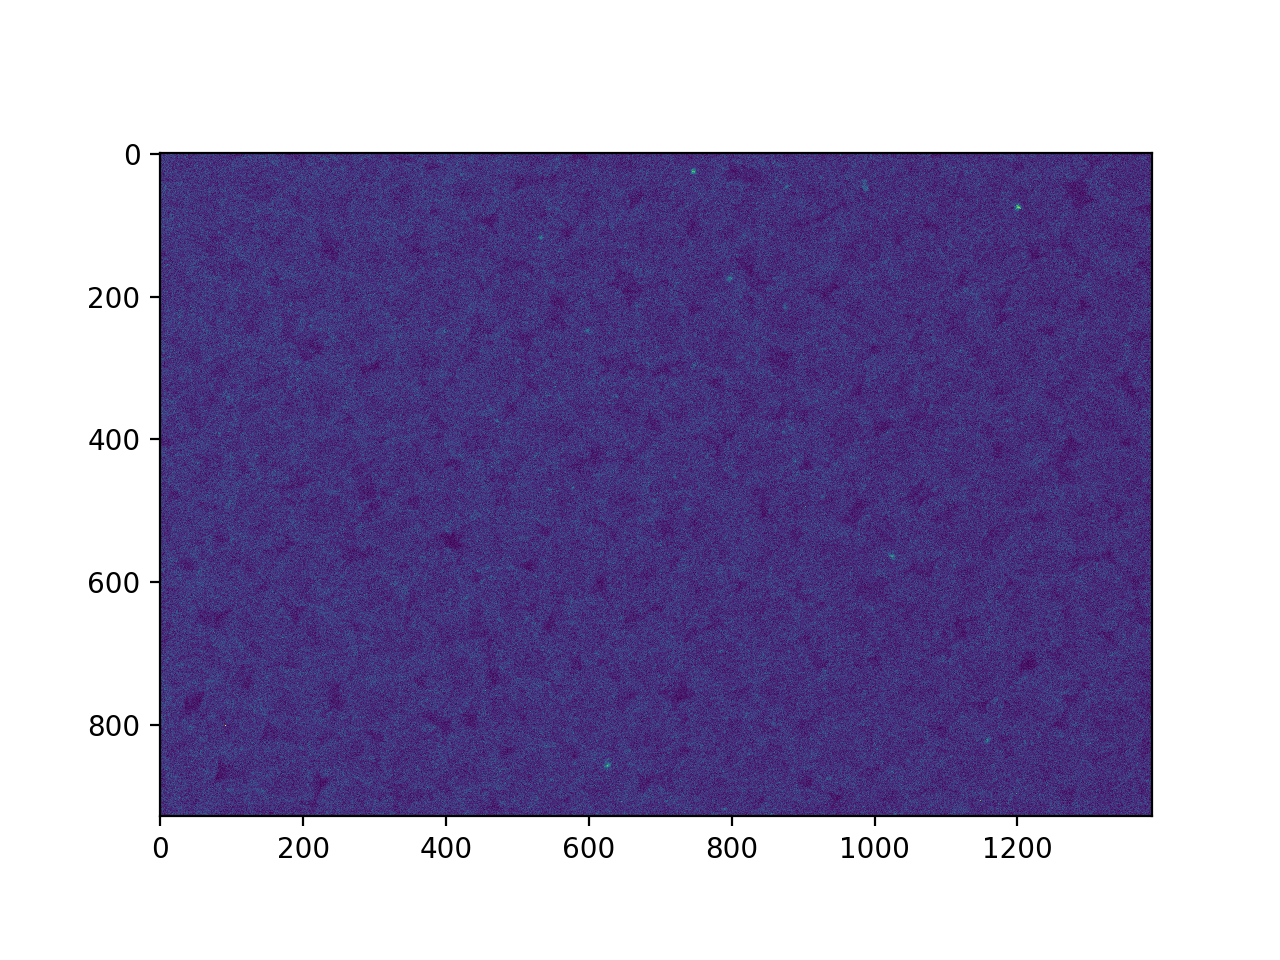

In [135]:
## Accessing and subsetting data
## 0 is MS2 channel
## 1 in chromatin channel

im = array[11, 0, 5, ...] # MS2
## im = array[11, 1, 5, ...] # Chromatin

plt.figure()
plt.imshow(im)
plt.show()

## -[] why do I need both commands?
## -[] How do I slide through z-stack?

In [136]:
## Usining the colon, you can get all slices scanned and make a maximum projection 
zstack = array[11, 0, :, ...]
zstack.shape

(21, 928, 1389)

In [37]:
### View Get Maximum projection

IM_MAX= np.max(zstack, axis=0)
plt.imshow(IM_MAX)
plt.show()

## Part 2a: Movie of Z-stack

- [FuncAnimation documentation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html)

### Questions

- What type of z-stack rendering was used? Maximum 
- Can I get both channels to be displayed?
- Why is viridis the default channel?
    - to change color: `im = ax.imshow(zstack[0, :, :], 'nipy_spectral')
    - How do I get to nice confocal color pallettes? 
    - [colormaps guide](https://matplotlib.org/tutorials/colors/colormaps.html)
 

<IPython.core.display.Javascript object>


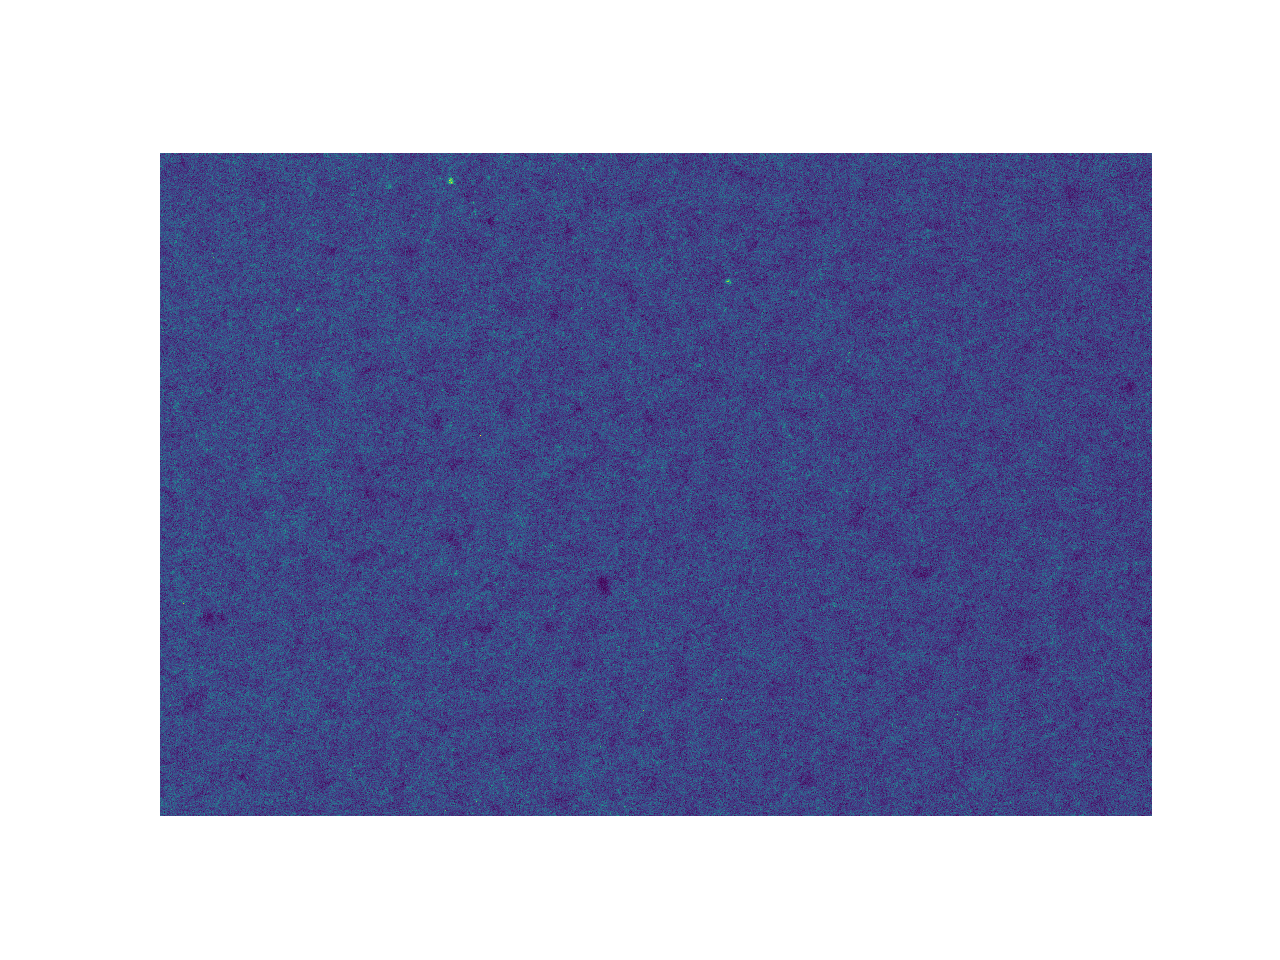

In [137]:
## go through each image in the z-stack

fig, ax = plt.subplots()
ax.axis('off') 
im = ax.imshow(zstack[0, :, :])

def update(i): # setting up the first image
    # Update method - What you want your figure to look like every single time
    im.set_array(zstack[i, :, :]) 
    return [im] #returned as a iterable object as a list.
    # frames is how long, by specifing how many images
    
movie = animation.FuncAnimation(fig, update, interval=200, frames=zstack.shape[0], blit=True)
plt.show()

## Setting a color threshold 

This is so I can take the noise away and see onl the MS2 dots.

- [Tutorial](https://matplotlib.org/users/image_tutorial.html)
- [Colors](https://matplotlib.org/tutorials/colors/colormaps.html)


<IPython.core.display.Javascript object>


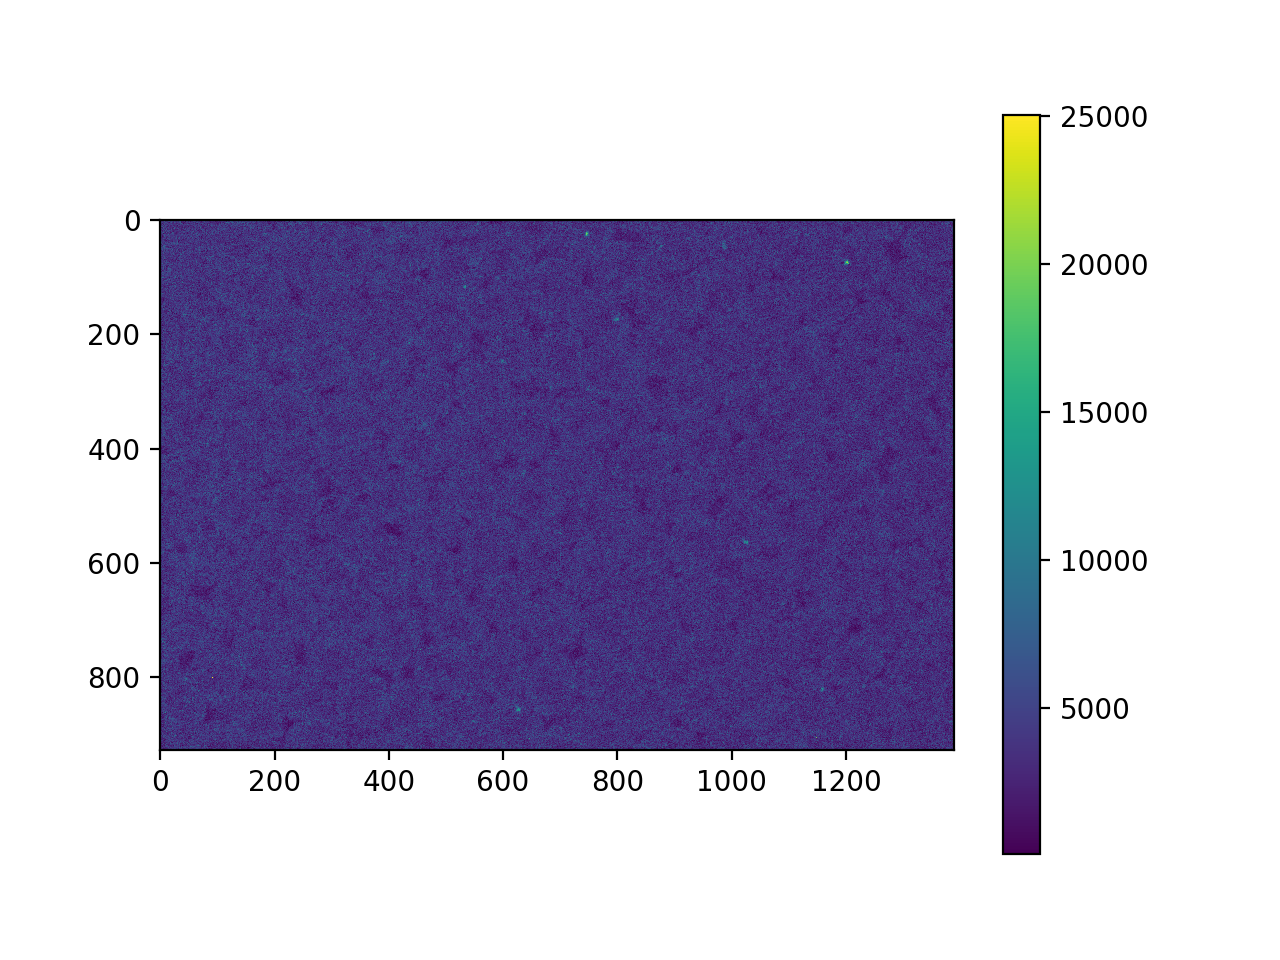

In [138]:
lum_img = array[11, 0, 5, ...]

plt.figure() # Set the stage
# This is array slicing.  You can read more in the `Numpy tutorial
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.

# To change color
#plt.imshow(lum_img, cmap='Greens') 

plt.imshow(lum_img) # makes the graph
plt.show() #displays the graph
plt.colorbar()

<IPython.core.display.Javascript object>


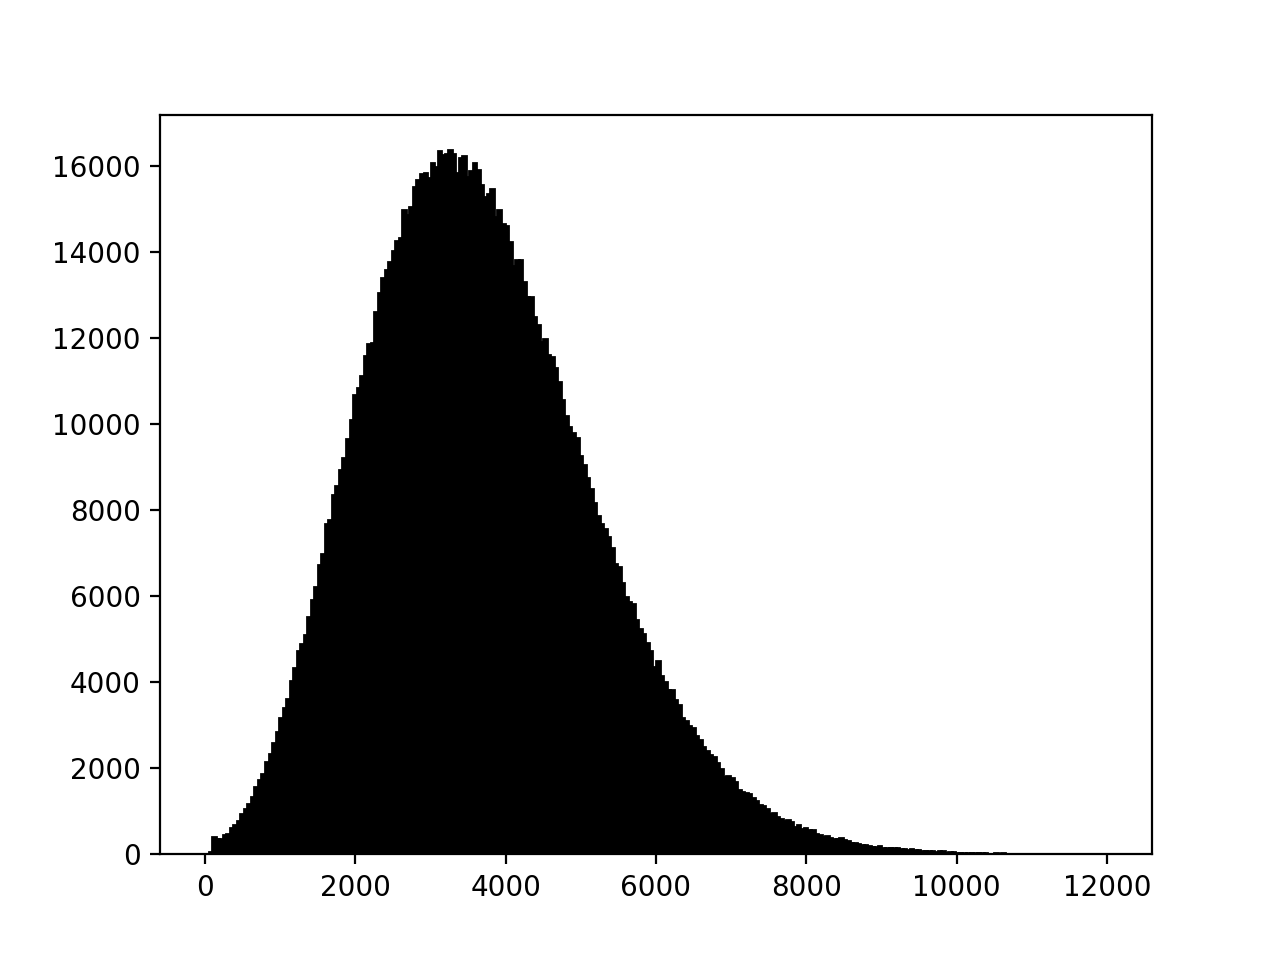

(array([0.0000e+00, 5.3000e+01, 4.0700e+02, 3.5500e+02, 3.4800e+02,
        4.4700e+02, 4.7500e+02, 6.1300e+02, 6.7600e+02, 7.8700e+02,
        9.4300e+02, 1.0670e+03, 1.1730e+03, 1.3240e+03, 1.5670e+03,
        1.7270e+03, 1.8810e+03, 2.1520e+03, 2.3360e+03, 2.5870e+03,
        2.8470e+03, 3.1610e+03, 3.4120e+03, 3.6110e+03, 4.0250e+03,
        4.3410e+03, 4.7390e+03, 4.8840e+03, 5.1140e+03, 5.5260e+03,
        5.9070e+03, 6.2160e+03, 6.7200e+03, 6.9760e+03, 7.6920e+03,
        7.7780e+03, 8.3470e+03, 8.5670e+03, 8.9310e+03, 9.2280e+03,
        9.6530e+03, 1.0101e+04, 1.0690e+04, 1.0845e+04, 1.1122e+04,
        1.1591e+04, 1.1878e+04, 1.1900e+04, 1.2623e+04, 1.3048e+04,
        1.3407e+04, 1.3580e+04, 1.3789e+04, 1.4028e+04, 1.4275e+04,
        1.4346e+04, 1.4994e+04, 1.4870e+04, 1.5056e+04, 1.5519e+04,
        1.5683e+04, 1.5828e+04, 1.5851e+04, 1.5723e+04, 1.6079e+04,
        1.5979e+04, 1.6354e+04, 1.6256e+04, 1.6285e+04, 1.6373e+04,
        1.6295e+04, 1.5851e+04, 1.6193e+04, 1.62

In [139]:
lum_img = array[11, 0, 5, ...]

plt.figure()
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 12000), fc='k', ec='k')
## Why is it displaying the array also?

<IPython.core.display.Javascript object>


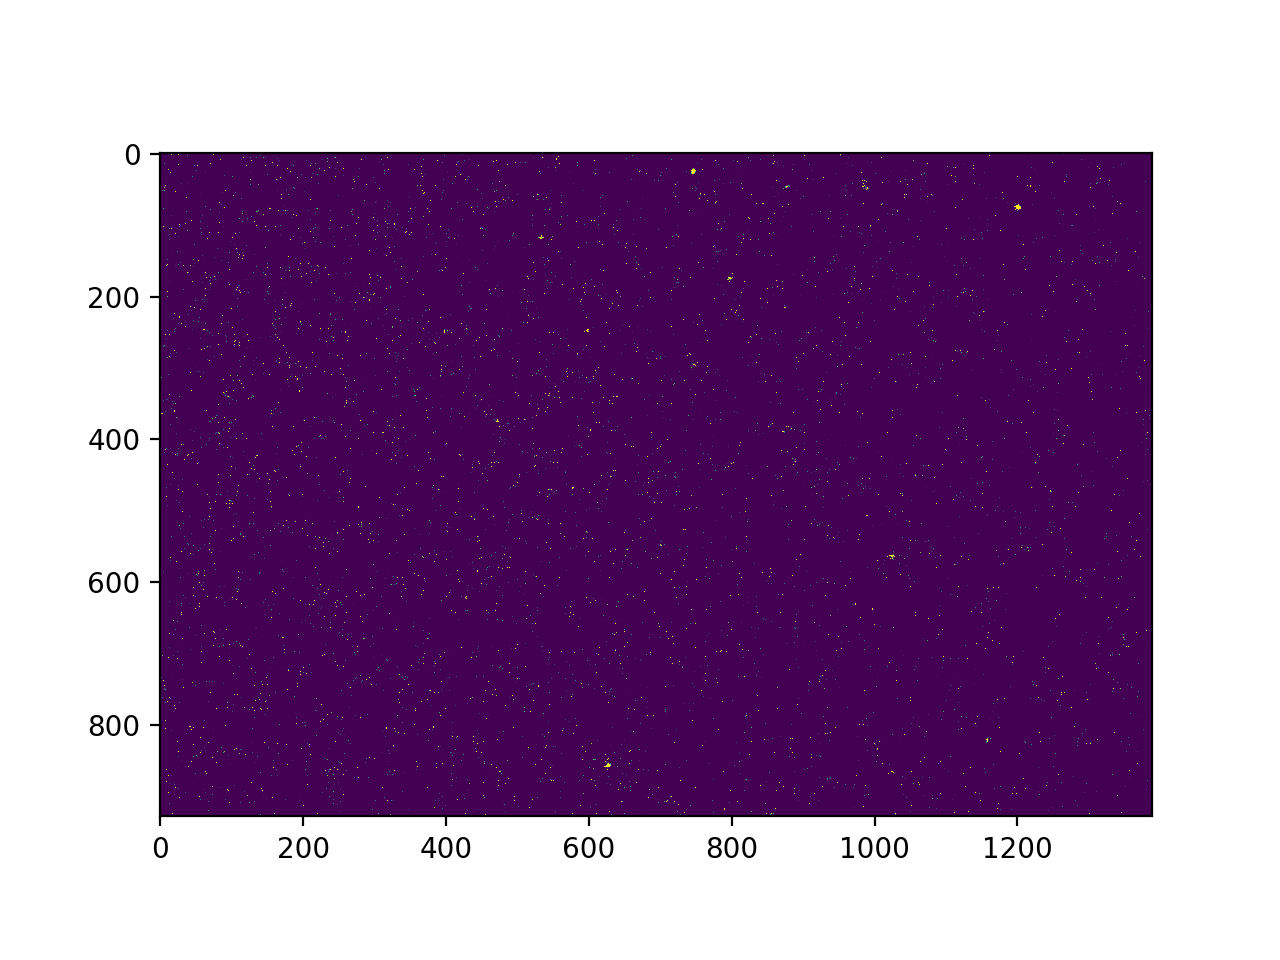

In [104]:
## Zoom in to tail of histogram
plt.figure()
imgplot = plt.imshow(lum_img, clim=(7900, 9000))

## This is good, but likely needs to be done on the maximum projection

<IPython.core.display.Javascript object>


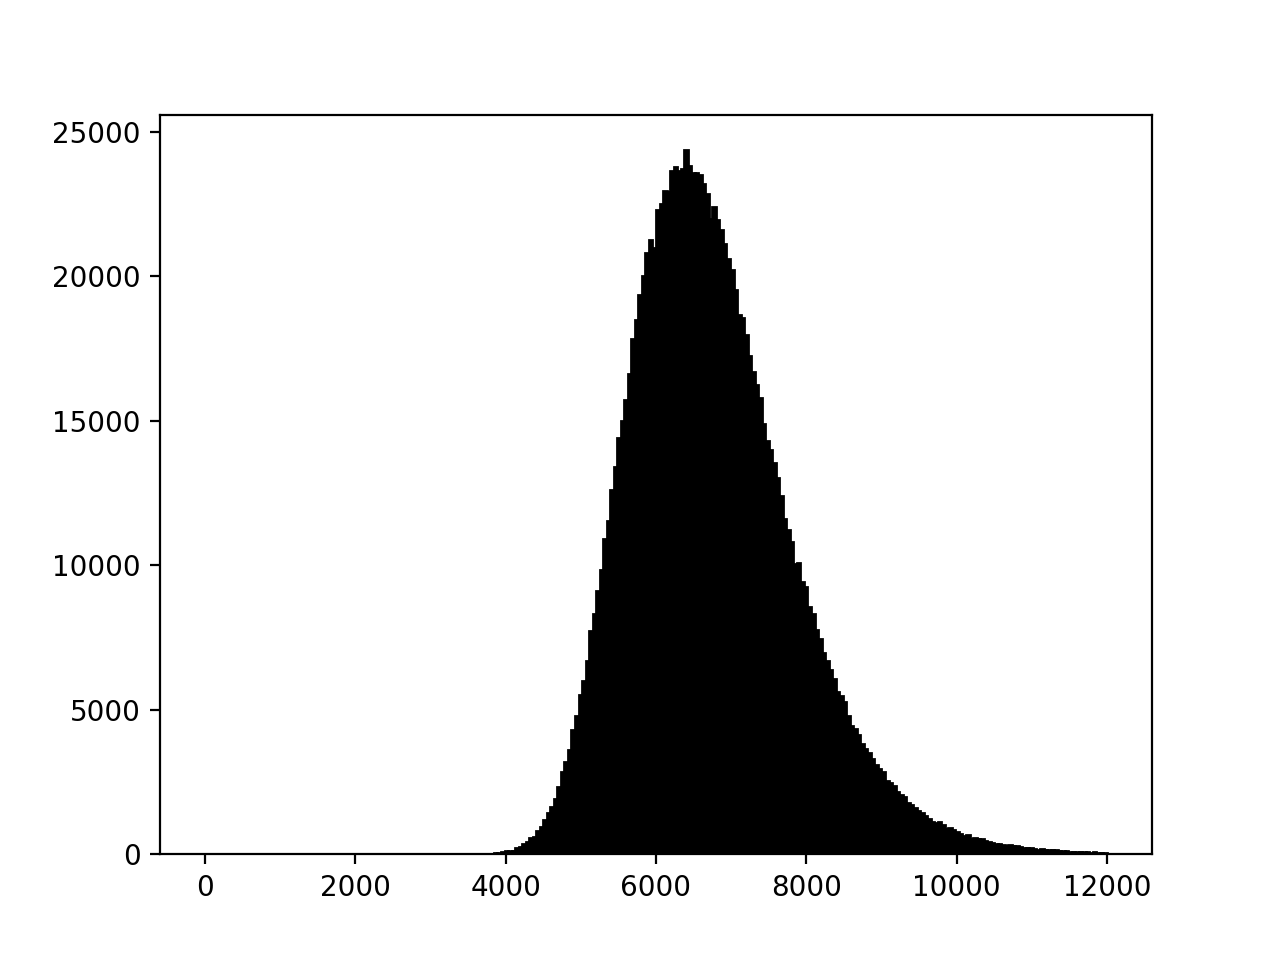

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.00

In [144]:
## access one slice of the frame
zstack = array[11, 0, :, ...]
zstack.shape
zstack
IM_MAX= np.max(zstack, axis=0)
lum_img = IM_MAX

## The threshold graph is done on the upper limit of this graph
plt.figure()
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 12000), fc='k', ec='k')

<IPython.core.display.Javascript object>


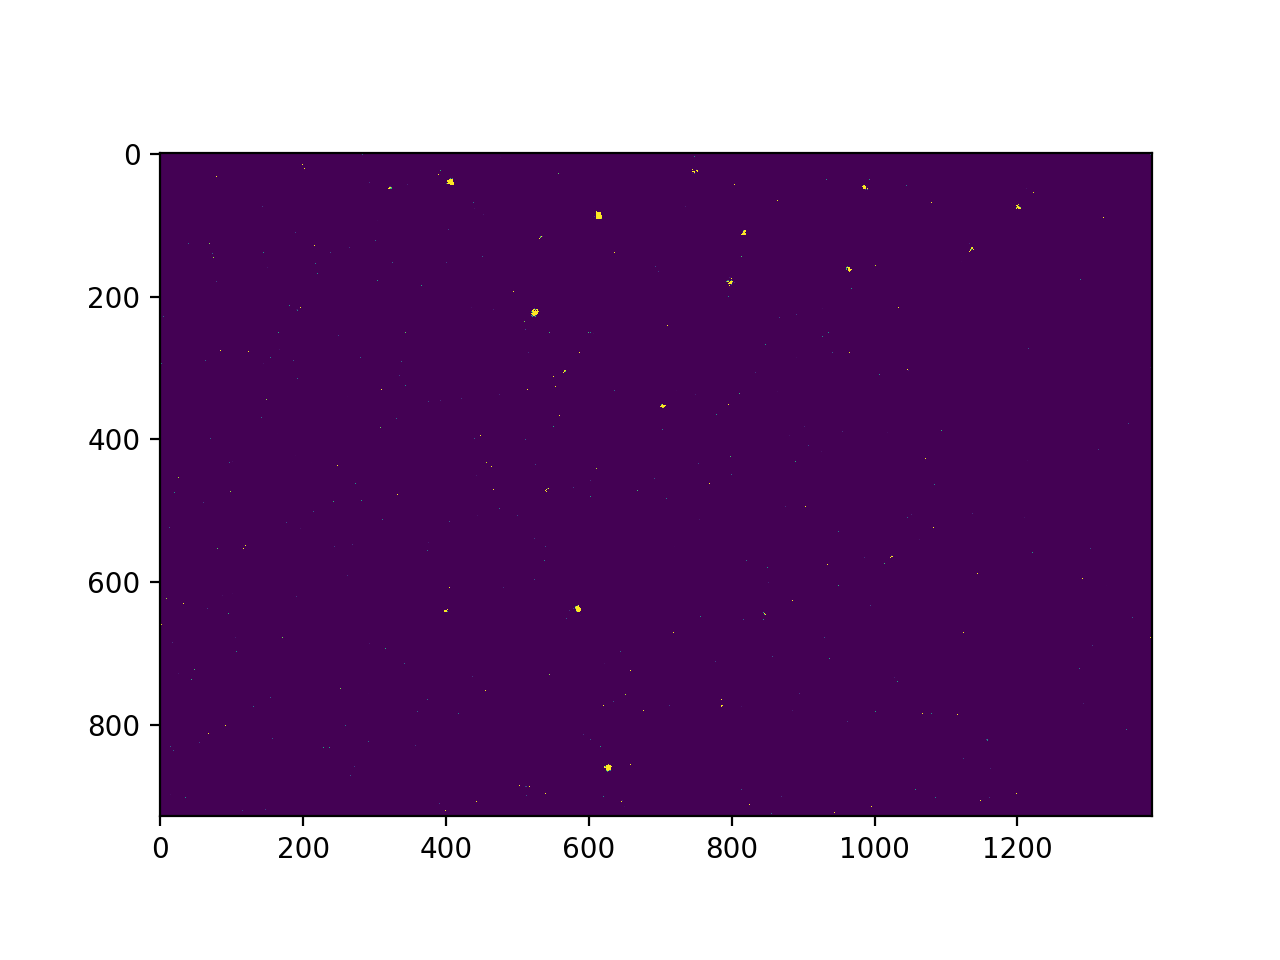

In [142]:
## Zoom in to tail of histogram
plt.figure()
imgplot = plt.imshow(lum_img, clim=(12200, 14000))

<IPython.core.display.Javascript object>


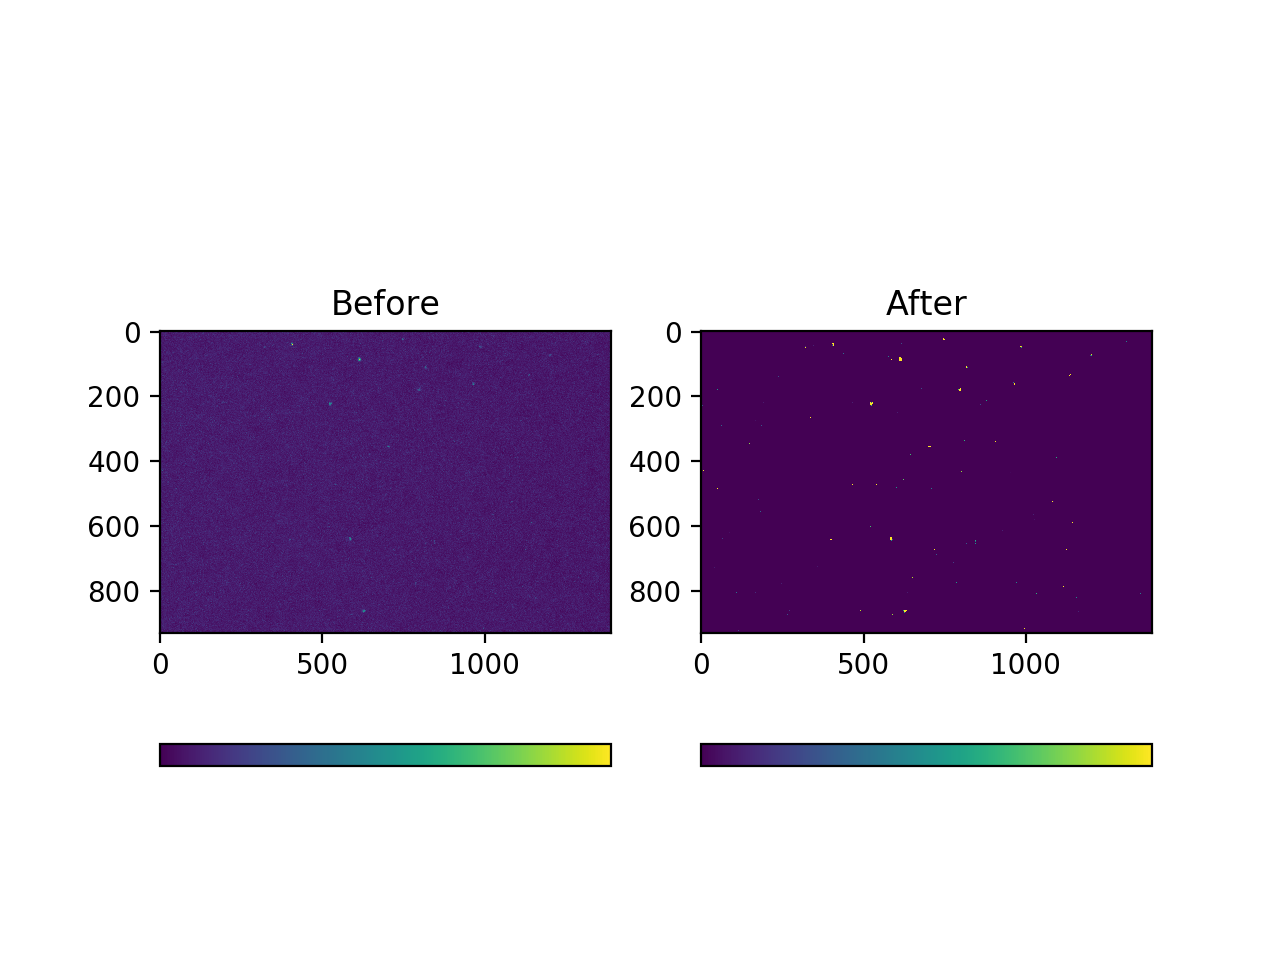

In [143]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(12200, 14000)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## Next Steps

The thresholding appears to be working pretty well to identify the MS2 spots, but there is def improvement to occur.

- [ ] Try out blob detecion

In [ ]:
## Resources

- [Scipy](https://docs.scipy.org/doc/scipy/reference/ndimage.html)
- [Scikit image](https://scikit-image.org/)
